<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%204/CMPE_258_Assignment_4C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 4C: Keras classifier

## Image Problem

### Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Tensorflow version" , tf.__version__)
print("Keras version" , keras.__version__)

Tensorflow version 2.8.0
Keras version 2.8.0


### Loading the Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In the next step, we will divide the training dataset into a tarining and a validation dataset , which will be used in further steps. In additon, we will scale the pixels into range(0,1) .

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

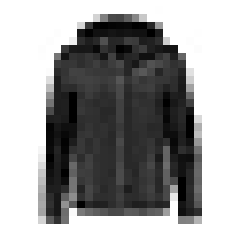

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [5]:
#Names of Classes

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
print("The records in validaton set is",X_valid.shape) # 5000 images
print("The records in Testing set is",X_test.shape) # 10000 records

The records in validaton set is (5000, 28, 28)
The records in Testing set is (10000, 28, 28)


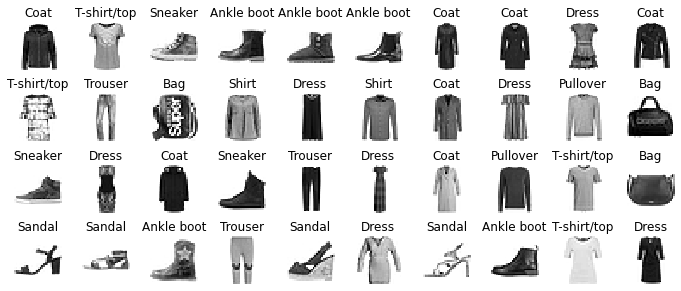

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating the Model

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7102 - accuracy: 0.7633 - val_loss: 0.5100 - val_accuracy: 0.8300
Epoch 2/20
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4842 - accuracy: 0.8312 - val_loss: 0.4326 - val_accuracy: 0.8514
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4389 - accuracy: 0.8452 - val_loss: 0.5245 - val_accuracy: 0.8030
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4126 - accuracy: 0.8556 - val_loss: 0.3906 - val_accuracy: 0.8682
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8621 - val_loss: 0.3746 - val_accuracy: 0.8698
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3755 - accuracy: 0.8679 - val_loss: 0.3662 - val_accuracy: 0.8754
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3634 - accuracy: 0.8722 - val_loss: 0.3601 - val_accurac

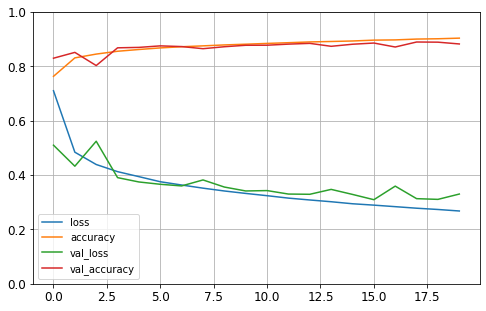

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Model Evaluation

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8677


[0.3630535304546356, 0.8676999807357788]

In [15]:
# Let us take 3 examples and see if it recognizes correctly
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.1 , 0.  , 0.88],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

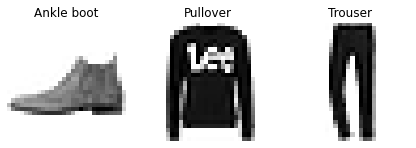

In [17]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Regression Problem

### Importing the Libraries

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(102)
tf.random.set_seed(102)

### Loading & Normalizing the Dataset

In [19]:
housing = fetch_california_housing()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Creating the Model

In [22]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [25]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9469 - val_loss: 0.9884
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8105 - val_loss: 0.7313
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6896 - val_loss: 0.6558
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6383 - val_loss: 0.6197
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6038 - val_loss: 0.6268
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5783 - val_loss: 0.5757
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5570 - val_loss: 0.5458
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5385 - val_loss: 0.5485
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5234 - val_loss: 0.5367
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5103 - val_loss: 0.4925

### Model Evaluation

In [26]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 2ms/step - loss: 0.4319


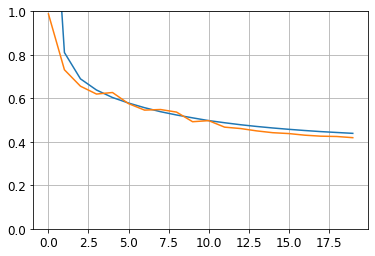

In [27]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()